### Step 4: Data Wrangling

The raw output data from coregistration step cannot be passed into machine learning model directly. They don't have labels and have too many features. 

The label is the thing we will try to predict with the machine learning models. In our case, the label is a True or False assertion. Each input data row is either a mineral deposit or not a mineral deposit. Given a data row, the machine learning model will tell us if the location is a mineral deposit or not. This is the ultimate goal we are trying to achieve in this machine learning workflow.

The feature is a column of the input data. There are many features in the coregistration output data. It is not wise to use too many features in the machine learning analysis because of the [Curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality). More features mean more dimensions. If you have 20 features/columns, the machine learning model has to do the analysis in a 20-dimensional space. Just imagine if you were thrown into a 20-dimensional space, I guess it would not be a happy experience to find a way out. Yes, some machine learning models are smart enough and can reduce the number of dimensions. But at the current point of human history, humans are still a little bit smarter than computers. So, let's help computers by reducing the number of features.

We will create a csv file, in which the last colomn is the label(0 or 1) and the other columns are features. 

The feature selection is highly related to the specific research. We need to identify the features which are most important to the formation of mineral deposit. For example, some researchers might think the distance along the trench is important. Others might think the sea floor age is of great significance. Come out with your own hypothesis, wrangle the data accordingly and then send the data into a machine learning model to be evaluated. Repeat this process until we find the most important features. This process is similar to a psychic finding a perfect crystal ball to start a fortune telling business. The only difference is that the psychic is doing magic, but we are doing science.

The following code cell will select features from coregistration output and create a csv file for the machine learning analysis in Step 5.

In [1]:
import numpy as np
import pandas as pd
from parameters import parameters as p
import Utils

#load data 
coreg_input_data = pd.read_csv(p['coreg_input_files'][0])
coreg_output_data = pd.read_csv('coreg_output/positive_deposits.csv')
print('The shape of coregistration input data is: ', coreg_input_data.shape)
print('The shape of coregistration output data is: ', coreg_output_data.shape)

if coreg_input_data.shape[0] == coreg_output_data.shape[0]:
    print('Good! The input and output data has the same length ', coreg_output_data.shape[0])

print()
print('the coregistration input data')
display(coreg_input_data)
print('the coregistration output data')
display(coreg_output_data)
print('the columns in coregistration output data are: ')
Utils.print_columns()



The shape of coregistration input data is:  (269, 5)
The shape of coregistration output data is:  (269, 27)
Good! The input and output data has the same length  269

the coregistration input data


,index,lon,lat,age,plate_id
0,0,-92.33,15.32,6,224
1,1,-98.75,20.25,21,101
2,2,-101.98,18.94,33,101
3,3,-104.40,29.81,60,101
4,4,-106.59,37.43,23,101
...,...,...,...,...,...
264,264,-109.82,29.81,62,101
265,265,-109.82,29.81,57,101
266,266,-109.82,29.81,52,101
267,267,-109.82,29.81,47,101


the coregistration output data


,lon,lat,age,plate_id,recon_lon,recon_lat,distance,trench_lon,trench_lat,conv_rate,...,dist_nearest_edge,dist_from_start,conv_ortho,conv_paral,trench_abs_ortho,trench_abs_paral,subducting_abs_rate,subducting_abs_angle,subducting_abs_ortho,subducting_abs_paral\n
0,-92.33,15.32,6.0,224.0,-92.707,15.279,0.026,-93.44,13.98,6.92,...,2.82,13.99,6.81,1.23,-0.30,-0.67,-6.52,5.42,6.49,0.62
1,-98.75,20.25,21.0,101.0,-96.214,20.783,0.061,-98.81,18.32,10.93,...,3.18,3.18,9.16,-5.95,-1.69,-1.11,-10.25,-43.22,7.47,-7.02
2,-101.98,18.94,33.0,101.0,-97.385,19.889,0.003,-97.44,19.74,17.56,...,0.29,0.29,14.66,9.68,-2.23,-2.37,-14.42,30.42,12.43,7.30
3,-104.40,29.81,60.0,101.0,-89.593,32.354,0.122,-96.82,29.10,9.12,...,14.88,46.04,9.12,0.03,-3.68,-1.89,-5.75,-18.98,5.44,-1.87
4,-106.59,37.43,23.0,101.0,-102.398,38.421,0.179,-115.42,37.77,9.75,...,0.09,0.09,9.28,2.98,-1.75,-0.89,-7.82,15.69,7.52,2.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,-109.82,29.81,62.0,101.0,-94.205,33.218,0.058,-97.53,31.48,13.11,...,8.80,55.09,12.86,2.55,-3.67,-1.92,-9.21,3.90,9.19,0.63
265,-109.82,29.81,57.0,101.0,-96.107,33.231,0.058,-99.52,31.62,9.54,...,12.02,48.62,9.54,0.16,-2.69,-1.63,-7.01,-12.16,6.86,-1.48
266,-109.82,29.81,52.0,101.0,-98.143,32.652,0.059,-101.94,31.55,12.71,...,0.97,0.97,12.66,-1.14,-4.30,0.45,-8.39,-4.66,8.36,-0.68
267,-109.82,29.81,47.0,101.0,-99.836,31.687,0.061,-103.51,30.17,9.90,...,9.34,14.96,9.73,-1.83,-2.65,-0.42,-7.42,-17.43,7.08,-2.22


the columns in coregistration output data are: 
* 0 reconstructed mineral deposits longitude
* 1 reconstructed mineral deposits latitude
* 2 distance to the nearest trench point
* 3 the index of trench point
* 4 trench point longitude
* 5 trench point latitude
* 6 subducting convergence (relative to trench) velocity magnitude (in cm/yr)
* 7 subducting convergence velocity obliquity angle (angle between trench normal vector and convergence velocity vector)
* 8 trench absolute (relative to anchor plate) velocity magnitude (in cm/yr)
* 9 trench absolute velocity obliquity angle (angle between trench normal vector and trench absolute velocity vector)
* 10 length of arc segment (in degrees) that current point is on
* 11 trench normal azimuth angle (clockwise starting at North, ie, 0 to 360 degrees) at current point
* 12 subducting plate ID
* 13 trench plate ID
* 14 distance (in degrees) along the trench line to the nearest trench edge
* 15 the distance (in degrees) along the trench line fro

##### After having a look at the data, let's start selecting features and add labels.

In [6]:
positive_data = pd.read_csv('coreg_output/positive_deposits.csv')
negative_data = pd.read_csv('coreg_output/negative_deposits.csv')
candidates_data = pd.read_csv('coreg_output/deposit_candidates.csv')

print(positive_data.columns)

feature_names=['conv_ortho', 'conv_paral', 'trench_abs_ortho', 'trench_abs_paral', 'subducting_abs_ortho', 'subducting_abs_paral\n']

ml_case_1_positive_data = positive_data[feature_names].dropna()
ml_case_1_negative_data = negative_data[feature_names].dropna()
ml_case_1_candidates_data = candidates_data[feature_names].dropna()

ml_case_1_positive_data['label']=True
ml_case_1_negative_data['label']=False

file_name_prefix='ml_case_1_'
#save the data
ml_case_1_positive_data.to_csv(file_name_prefix+'positive.csv',index=False)
ml_case_1_negative_data.to_csv(file_name_prefix+'negative.csv',index=False)
ml_case_1_candidates_data.to_csv(file_name_prefix+'candidates.csv',index=False)

import glob
files = glob.glob('./ml_case_1*.csv')
print('\ngenerated files:')
for f in files:
    print(f)


Index(['lon', 'lat', 'age', 'plate_id', 'recon_lon', 'recon_lat', 'distance',
       'trench_lon', 'trench_lat', 'conv_rate', 'conv_angle',
       'trench_abs_rate', 'trench_abs_angle', 'arc_len', 'trench_norm',
       'subducting_pid', 'trench_pid', 'dist_nearest_edge', 'dist_from_start',
       'conv_ortho', 'conv_paral', 'trench_abs_ortho', 'trench_abs_paral',
       'subducting_abs_rate', 'subducting_abs_angle', 'subducting_abs_ortho',
       'subducting_abs_paral\n'],
      dtype='object')

generated files:
./ml_case_1_negative.csv
./ml_case_1_positive.csv
./ml_case_1_candidates.csv


#### The dataset has 5 features(dimensions). It is difficult to visualize the data in high dimensional space. So, let's plot it in two dimensions. 

Sometimes we can see a little bit the pattern of mineral deposit distribution in the 2D plots. Sometimes we cannot. For example, it seems there are many mineral deposits when the seafloor age is between 20 and 110 million years in the plot below. Something to think about, in terms of what this may mean.

The machine learning models can help us to find out the distribution pattern in a higher dimensional space, which might not emerge in a lower dimensional space. Machine learning analysis cannot tell us the exact distribution pattern, but it can give us an estimation with a certain accuracy. Two-dimensional xy-plots are useful for plotting one feature against a second feature of our choice, so explore whether we can detect any patterns in the data, in terms of known mineral deposits versus "non-deposit" locations.

,lon,lat,age,plate_id,recon_lon,recon_lat,distance,trench_lon,trench_lat,conv_rate,...,dist_nearest_edge,dist_from_start,conv_ortho,conv_paral,trench_abs_ortho,trench_abs_paral,subducting_abs_rate,subducting_abs_angle,subducting_abs_ortho,subducting_abs_paral\n
0,-92.33,15.32,6.0,224.0,-92.707,15.279,0.026,-93.44,13.98,6.92,...,2.82,13.99,6.81,1.23,-0.30,-0.67,-6.52,5.42,6.49,0.62
1,-98.75,20.25,21.0,101.0,-96.214,20.783,0.061,-98.81,18.32,10.93,...,3.18,3.18,9.16,-5.95,-1.69,-1.11,-10.25,-43.22,7.47,-7.02
2,-101.98,18.94,33.0,101.0,-97.385,19.889,0.003,-97.44,19.74,17.56,...,0.29,0.29,14.66,9.68,-2.23,-2.37,-14.42,30.42,12.43,7.30
3,-104.40,29.81,60.0,101.0,-89.593,32.354,0.122,-96.82,29.10,9.12,...,14.88,46.04,9.12,0.03,-3.68,-1.89,-5.75,-18.98,5.44,-1.87
4,-106.59,37.43,23.0,101.0,-102.398,38.421,0.179,-115.42,37.77,9.75,...,0.09,0.09,9.28,2.98,-1.75,-0.89,-7.82,15.69,7.52,2.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,-109.82,29.81,62.0,101.0,-94.205,33.218,0.058,-97.53,31.48,13.11,...,8.80,55.09,12.86,2.55,-3.67,-1.92,-9.21,3.90,9.19,0.63
265,-109.82,29.81,57.0,101.0,-96.107,33.231,0.058,-99.52,31.62,9.54,...,12.02,48.62,9.54,0.16,-2.69,-1.63,-7.01,-12.16,6.86,-1.48
266,-109.82,29.81,52.0,101.0,-98.143,32.652,0.059,-101.94,31.55,12.71,...,0.97,0.97,12.66,-1.14,-4.30,0.45,-8.39,-4.66,8.36,-0.68
267,-109.82,29.81,47.0,101.0,-99.836,31.687,0.061,-103.51,30.17,9.90,...,9.34,14.96,9.73,-1.83,-2.65,-0.42,-7.42,-17.43,7.08,-2.22


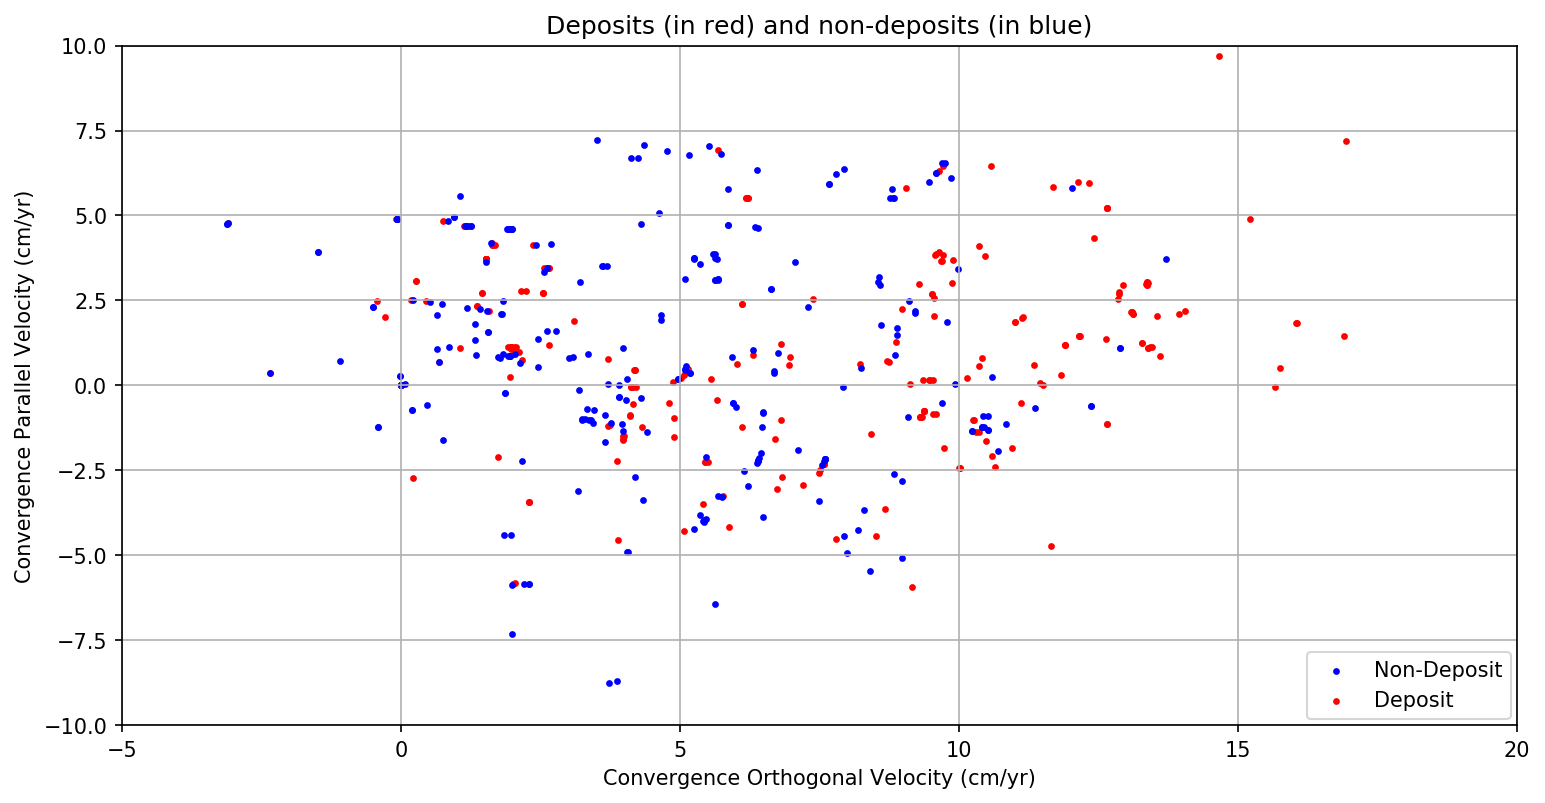

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12,6),dpi=150)
ax = plt.axes()

positive = pd.read_csv('coreg_output/positive_deposits.csv')
negative = pd.read_csv('coreg_output/negative_deposits.csv')

display(positive)

p1=ax.scatter(positive['conv_ortho'], 
           positive['conv_paral'],
           20, marker='.',c='red')
p2=ax.scatter(negative['conv_ortho'], 
           negative['conv_paral'], 
           20, marker='.',c='blue')

ax.set_xlim(-5, 20)
ax.set_ylim(-10, 10)
plt.xlabel('Convergence Orthogonal Velocity (cm/yr)')
plt.ylabel('Convergence Parallel Velocity (cm/yr)')
plt.title('Deposits (in red) and non-deposits (in blue)')
ax.legend([p2,p1],["Non-Deposit","Deposit"],
            loc=4, borderaxespad=0.3,numpoints=1)
plt.grid()
plt.show()


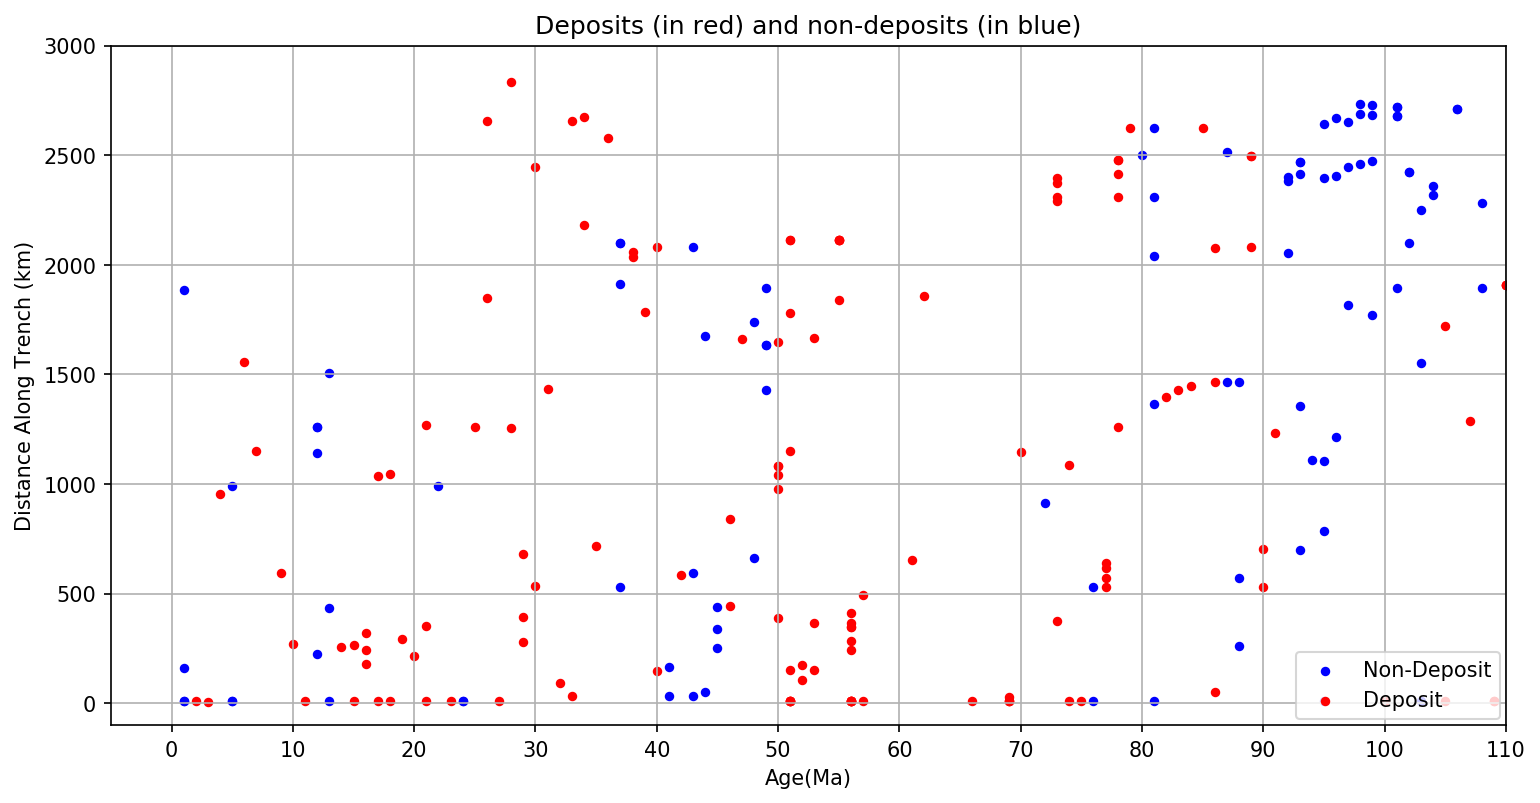

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12,6),dpi=150)
ax = plt.axes()

positive = pd.read_csv('coreg_output/positive_deposits.csv')
negative = pd.read_csv('coreg_output/negative_deposits.csv')

p1=ax.scatter(positive['age'], 
           positive['dist_from_start']* 6371. * np.pi / 180,
           50, marker='.',c='red')
p2=ax.scatter(negative['age'], 
           negative['dist_from_start']* 6371. * np.pi / 180, 
           50, marker='.',c='blue')
ax.set_xticks(np.arange(0,231,10))
#ax.set_yticks(np.arange(0,8000,500))
ax.set_xlim(-5, 110)
ax.set_ylim(-100, 3000)
plt.xlabel('Age(Ma)')
plt.ylabel('Distance Along Trench (km)')
plt.title('Deposits (in red) and non-deposits (in blue)')
ax.legend([p2,p1],["Non-Deposit","Deposit"],
            loc=4, borderaxespad=0.3,numpoints=1)
plt.grid()
plt.show()


##### Let's try to plot it in a 3-dimensional space

(269, 27) (269, 27)


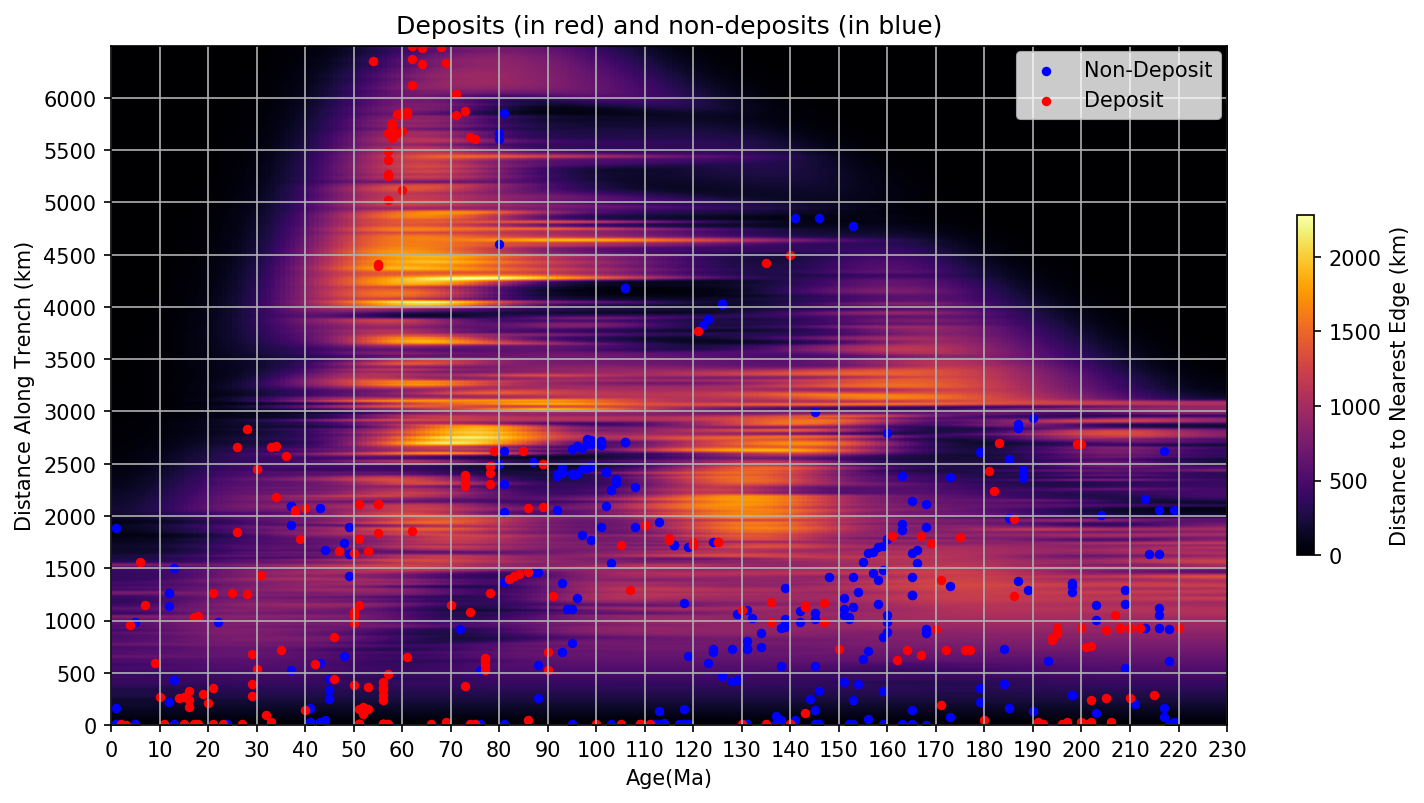

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy as np
from scipy import misc, ndimage

positive = pd.read_csv('coreg_output/positive_deposits.csv')
negative = pd.read_csv('coreg_output/negative_deposits.csv')
data = pd.read_csv('coreg_output/deposit_candidates.csv')

positive.dropna(inplace=True)
negative.dropna(inplace=True)
print(positive.shape, negative.shape)

data.dropna(inplace=True)
ages = data['age'].values.tolist()
dist_along_trench=(data['dist_from_start']* 6371. * np.pi / 180).values.tolist()
dist_nearest_edge=(data['dist_nearest_edge']* 6371. * np.pi / 180).values.tolist()


fig = plt.figure(figsize=(12,6),dpi=150)
ax = plt.axes()
plt.xlim([0,230])
plt.ylim([0,6500])

grid_x, grid_y = np.mgrid[0:231, 0:6501]
grid_data = griddata(list(zip(ages, dist_along_trench)), dist_nearest_edge, 
                     (grid_x, grid_y), method='linear', fill_value=0)
grid_data = ndimage.gaussian_filter(grid_data, sigma=10)
cb=plt.imshow(grid_data.T, extent=(0,230,0, 6500), origin='lower', aspect='auto',cmap=plt.cm.inferno)
#cb=ax.scatter(ages, dist_along_trench, c=dist_nearest_edge,cmap=plt.cm.jet)
p2=ax.scatter(negative['age'], negative['dist_from_start']* 6371. * np.pi / 180, 50, marker='.',c='blue')
p1=ax.scatter(positive['age'], positive['dist_from_start']* 6371. * np.pi / 180, 50, marker='.',c='red')
ax.set_xticks(np.arange(0,240,10))
ax.set_yticks(np.arange(0,6500,500))
plt.xlabel('Age(Ma)')
plt.ylabel('Distance Along Trench (km)')
plt.title('Deposits (in red) and non-deposits (in blue)')
plt.grid()
ax.legend([p2,p1],["Non-Deposit","Deposit"],
            loc=1, borderaxespad=0.3,numpoints=1)
fig.colorbar(cb, shrink=0.5, label='Distance to Nearest Edge (km)')

plt.show()

From above plot we can see that the mineral deposits seem to be concentrated in the "hot" area between ages 0 to 70 million years ago. However, we cannot predict mineral deposits by using the above plot alone because the accuracy would not be sufficient. Now, let's move to the next step and evaluate some machine learning models. After training the models, we can try to do some predictions on a test dataset, and then try to make predictions for unexplored locations.

#### Note:
The construction of a multi-dimensional space (what we have done in this notebook) is important because the deposit distribution might be clearer to see in one space than the other, but we don't know which space is the best one to choose to start with. Choose your features carefully based on your background reading and your hypotheses and iterate towards. And be aware of the [Curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality).

#### This is the end of step 4 and now open the step 5 notebook -- 5_Machine_Learning.ipynb